# WeatherPy

## Analysis
- The highest temperatures were seen around the tropic of cancer and capricorn, which are at -23.5 and 23.5 degrees latitude, which recieve the most amount of sunlight.
- Humidity varies across all latitudes, but there are high humidity percentages between the tropic of cancer and capricorn.
- There looks to be higher wind speeds going farther away from the tropic of capricorn and cancer.

In [1]:
!pip install citipy

    100% |████████████████████████████████| 563kB 1.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for citipy ... done
  Stored in directory: /Users/frankwaters/Library/Caches/pip/wheels/68/ab/e8/bf9e7c2e7a41fd29026e52d88379ebc770f90eace3b616a420
Successfully built citipy


# Generate Cities List

In [20]:
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd
import requests as req
import json

In [21]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [22]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [23]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [11]:
samplecity

,city,country
5899,primorsko-akhtarsk,ru
2303,buenos aires,cr
4363,juegang,cn
3775,keelung,tw
2874,yarim,ye
4367,tanabe,jp
1781,carutapera,br
144,coihueco,cl
1634,sungaipenuh,id
1280,karonga,mw


# Perform API Calls

In [25]:
apikey = "dfaafe16bb23df18c25c492b3750921e"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"City is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

This is city#: 1
City is: texarkana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=texarkana
This is city#: 2
City is: bezhta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=bezhta
This is city#: 3
City is: kinsale
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=kinsale
This is city#: 4
City is: burgeo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=burgeo
This is city#: 5
City is: solenzo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=solenzo
This is city#: 6
City is: stepnogorsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c49

This is city#: 48
City is: mufumbwe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=mufumbwe
This is city#: 49
City is: campbellton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=campbellton
This is city#: 50
City is: cherepanovo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=cherepanovo
This is city#: 51
City is: iraray
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=iraray
This is city#: 52
City is: san ignacio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=san ignacio
This is city#: 53
City is: pirovskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 94
City is: dzialdowo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=dzialdowo
This is city#: 95
City is: saint-pierre
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=saint-pierre
This is city#: 96
City is: togur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=togur
This is city#: 97
City is: calatayud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=calatayud
This is city#: 98
City is: pedernales
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=pedernales
This is city#: 99
City is: tailai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=d

This is city#: 140
City is: mubi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=mubi
This is city#: 141
City is: chippewa falls
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=chippewa falls
This is city#: 142
City is: japura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=japura
This is city#: 143
City is: putyatino
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=putyatino
This is city#: 144
City is: ulety
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=ulety
This is city#: 145
City is: cabadiangan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaa

This is city#: 187
City is: charagua
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=charagua
This is city#: 188
City is: salta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=salta
No data for this city: platonovka
This is city#: 189
City is: platonovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=platonovka
This is city#: 190
City is: toribio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=toribio
This is city#: 191
City is: cotui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=cotui
This is city#: 192
City is: bartlesville
This is the requested URL: http://api.openweathermap.or

This is city#: 233
City is: linjiang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=linjiang
No data for this city: tostamaa
This is city#: 234
City is: tostamaa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=tostamaa
This is city#: 235
City is: magadan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=magadan
This is city#: 236
City is: birr
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=birr
This is city#: 237
City is: bondowoso
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=bondowoso
This is city#: 238
City is: lebrija
This is the requested URL: http://api.openweathermap.org/dat

This is city#: 279
City is: vasilsursk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=vasilsursk
This is city#: 280
City is: satun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=satun
This is city#: 281
City is: tyrma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=tyrma
This is city#: 282
City is: vuktyl
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=vuktyl
This is city#: 283
City is: manutuke
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=manutuke
No data for this city: pousat
This is city#: 284
City is: pousat
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 325
City is: halmstad
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=halmstad
This is city#: 326
City is: serabu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=serabu
This is city#: 327
City is: coldwater
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=coldwater
No data for this city: manalurpet
This is city#: 328
City is: manalurpet
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=manalurpet
No data for this city: attawapiskat
This is city#: 329
City is: attawapiskat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=attawapiskat
This is city#: 330
City is: bhuban
This 

This is city#: 372
City is: portsmouth
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=portsmouth
This is city#: 373
City is: guane
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=guane
This is city#: 374
City is: youkounkoun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=youkounkoun
This is city#: 375
City is: ciudad real
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=ciudad real
This is city#: 376
City is: kargasok
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=kargasok
This is city#: 377
City is: bulungu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?

This is city#: 418
City is: shunyi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=shunyi
This is city#: 419
City is: el sauzal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=el sauzal
This is city#: 420
City is: lake city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=lake city
This is city#: 421
City is: raduzhnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=raduzhnyy
This is city#: 422
City is: waterlooville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=waterlooville
This is city#: 423
City is: kasempa
This is the requested URL: http://api.openweathermap.org/data/2.5/weathe

This is city#: 465
City is: uhlove
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=uhlove
This is city#: 466
City is: foz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=foz
No data for this city: tambul
This is city#: 467
City is: tambul
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=tambul
This is city#: 468
City is: atascocita
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=atascocita
This is city#: 469
City is: chai badan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=dfaafe16bb23df18c25c492b3750921e&units=Imperial&q=chai badan
This is city#: 470
City is: bulawayo
This is the requested URL: http://api.openweathermap.org/data/2

In [26]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
4299,texarkana,us,33,33,62,100,90,5
5400,bezhta,ru,42,42,30,85,36,1
6338,kinsale,ie,51,51,28,86,75,13
5856,burgeo,ca,47,47,29,100,12,27
2675,solenzo,bf,12,12,70,89,44,7
6655,stepnogorsk,kz,52,52,11,86,76,11
7665,petrozavodsk,ru,61,61,-14,75,8,2
6978,slave lake,ca,55,55,31,55,44,9
6025,rassvet,ru,47,47,2,84,44,4
6003,szalkszentmarton,hu,46,46,18,90,80,11


# Latitude vs Temperature Plot

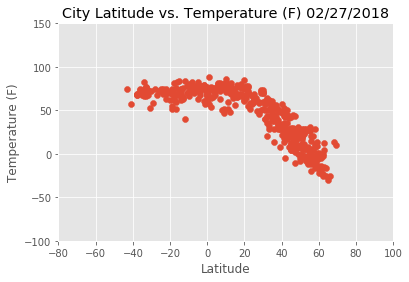

In [41]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"City Latitude vs. Temperature (F) {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.axis([-80, 100, -100, 150])
plt.show()


# Latitude vs Humidity Plot

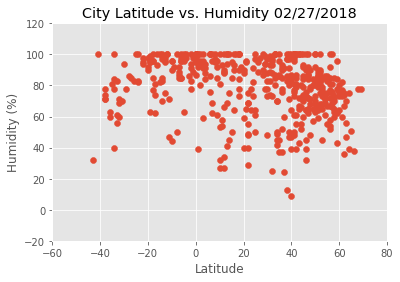

In [43]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.axis([-60, 80, -20, 120])
plt.show()

# Latitude vs Cloudiness Plot

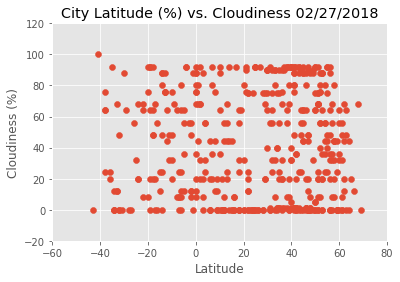

In [44]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"City Latitude (%) vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.axis([-60, 80, -20, 120])
plt.show()

# Latitude vs Wind Speed Plot

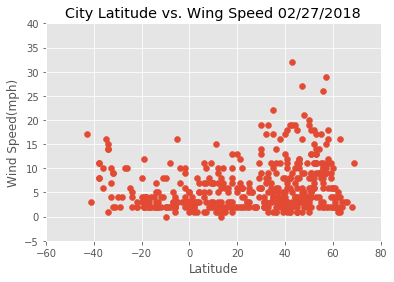

In [45]:

# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"City Latitude vs. Wing Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.axis([-60, 80, -5, 40])
plt.show()

In [31]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,texarkana,us,33,33,62,100,90,5
1,bezhta,ru,42,42,30,85,36,1
2,kinsale,ie,51,51,28,86,75,13
3,burgeo,ca,47,47,29,100,12,27
4,solenzo,bf,12,12,70,89,44,7
